# **Perbandingan Algoritma Klasifikasi dalam Memprediksi Penyakit Jantung**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import joblib


In [6]:

df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289

# **PREPROCESSING DATA**

In [7]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [8]:
X = df.drop("target", axis=1)
y = df["target"]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

# **EDA**

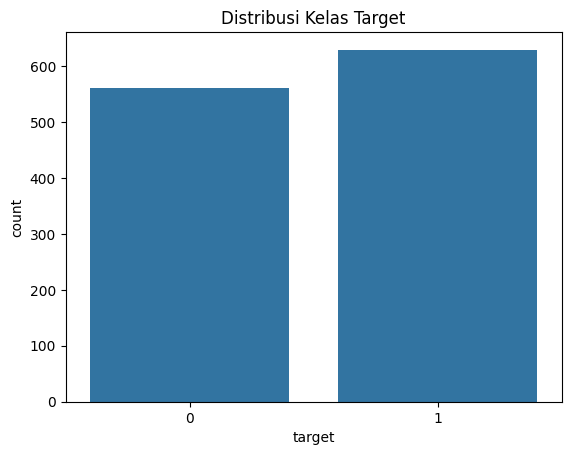

In [11]:
sns.countplot(x=y)
plt.title("Distribusi Kelas Target")
plt.show()

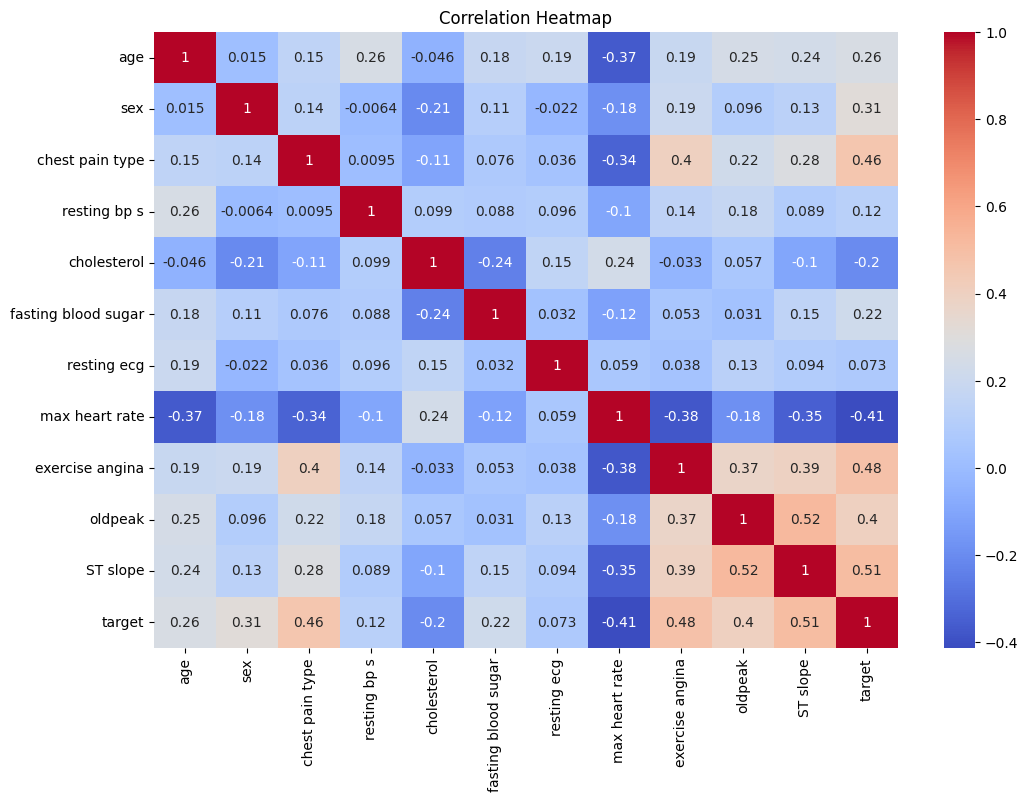

In [12]:
# Korelasi antar fitur
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

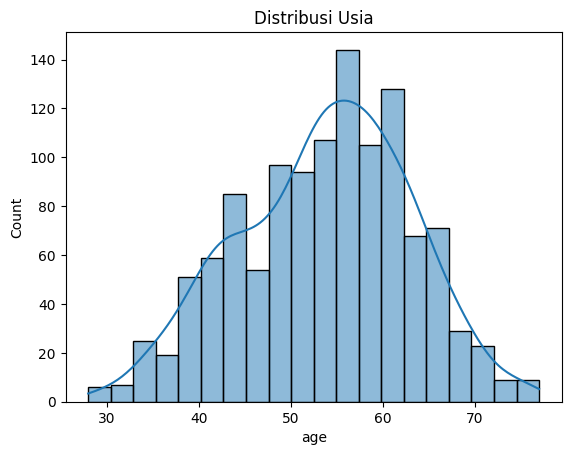

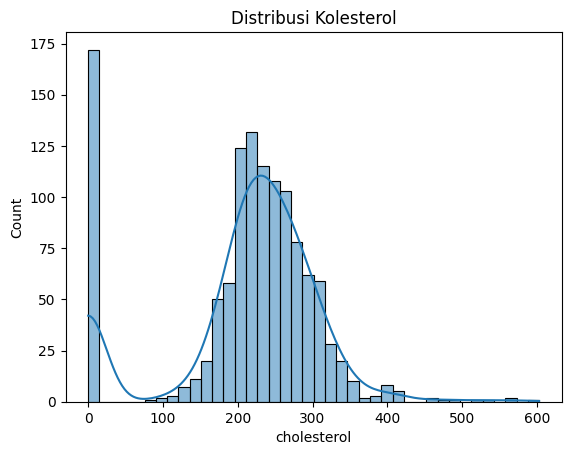

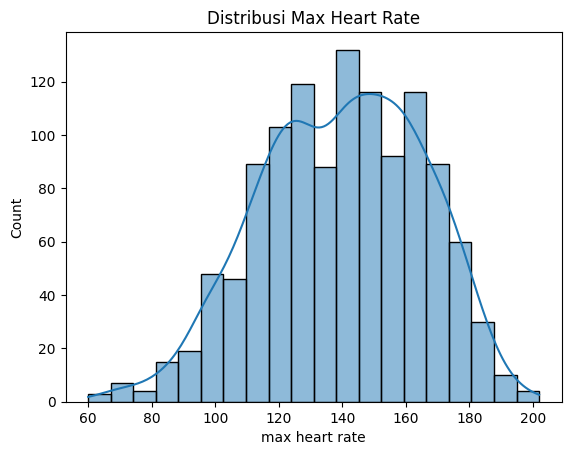

In [13]:
sns.histplot(df["age"], kde=True)
plt.title("Distribusi Usia")
plt.show()

sns.histplot(df["cholesterol"], kde=True)
plt.title("Distribusi Kolesterol")
plt.show()

sns.histplot(df["max heart rate"], kde=True)
plt.title("Distribusi Max Heart Rate")
plt.show()


# **SELEKSI FITUR**

In [14]:
selector = SelectKBest(score_func=chi2, k=8)
X_selected = selector.fit_transform(abs(X), y)

selected_features = X.columns[selector.get_support()]
print("Fitur Terpilih:", selected_features)


Fitur Terpilih: Index(['age', 'chest pain type', 'resting bp s', 'cholesterol',
       'max heart rate', 'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')


# **MODELING**

In [17]:
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [18]:
#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [19]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [20]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# **EVALUASI MODEL**

In [21]:
def evaluate(y_test, y_pred, name):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-Score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

evaluate(y_test, y_pred_nb, "Naive Bayes")
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_knn, "KNN")
evaluate(y_test, y_pred_lr, "Logistic Regression")



Naive Bayes
Accuracy : 0.8571428571428571
Precision: 0.8646616541353384
Recall   : 0.8778625954198473
F1-Score : 0.8712121212121212
Confusion Matrix:
 [[ 89  18]
 [ 16 115]]

Decision Tree
Accuracy : 0.8991596638655462
Precision: 0.9349593495934959
Recall   : 0.8778625954198473
F1-Score : 0.905511811023622
Confusion Matrix:
 [[ 99   8]
 [ 16 115]]

KNN
Accuracy : 0.8865546218487395
Precision: 0.8714285714285714
Recall   : 0.9312977099236641
F1-Score : 0.9003690036900369
Confusion Matrix:
 [[ 89  18]
 [  9 122]]

Logistic Regression
Accuracy : 0.8613445378151261
Precision: 0.8712121212121212
Recall   : 0.8778625954198473
F1-Score : 0.8745247148288974
Confusion Matrix:
 [[ 90  17]
 [ 16 115]]


In [22]:
results = pd.DataFrame({
    "Model": ["Naive Bayes", "Decision Tree", "KNN", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_lr)
    ],
    "Precision": [
        precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_lr)
    ],
    "Recall": [
        recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_lr)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_lr)
    ]
})

results


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.857143,0.864662,0.877863,0.871212
1,Decision Tree,0.899160,0.934959,0.877863,0.905512
2,KNN,0.886555,0.871429,0.931298,0.900369
3,Logistic Regression,0.861345,0.871212,0.877863,0.874525


#Kesimpulan

Berdasarkan hasil analisis yang telah kami amati disini dapat disimpulkan bahwa semua algoritma(Naive Bayes, Decision Tree, KNN, Logistic Regression) memiliki performa yang baik. Namun diantara semua algoritma lainnya, algoritma Decision Tree paling terbaik dan mampu memodelkan secara efektif dan memberi prediksi yang lebih akurat.

In [23]:
joblib.dump(lr, "heart_disease_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']